In [273]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [274]:
df = pd.read_csv('insurance.csv')

In [275]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [276]:
df['smoker'] .replace(('yes', 'no'), (1, 0), inplace=True)
df['sex'] .replace(('male', 'female'), (1, 0), inplace=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [277]:
df = df.rename(columns={'sex':'sex_male'})

In [278]:
# charge_true = 25000
# df['charges'] = df['charges'].apply(lambda x: 1 if x > charge_true else 0)

In [279]:
df.head()

,age,sex_male,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [280]:
df.describe()

,age,sex_male,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000


In [281]:
correlations = df.corr()
print(correlations['charges'])

age                 0.299008
sex_male            0.057292
bmi                 0.198341
children            0.067998
smoker              0.787251
charges             1.000000
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: charges, dtype: float64


<AxesSubplot:>

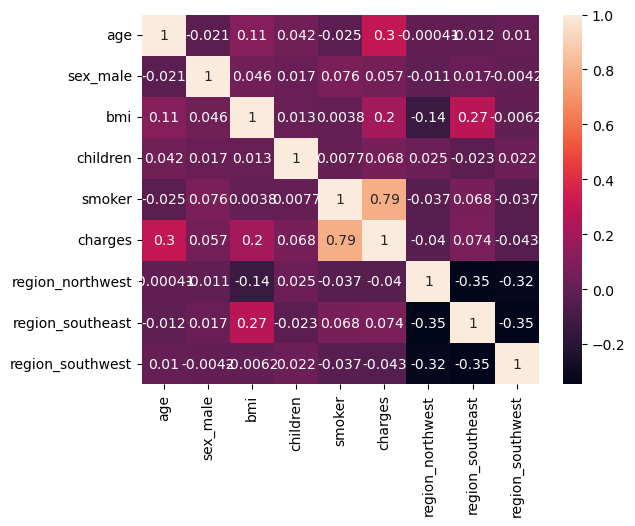

In [282]:
import seaborn as sns
sns.heatmap(correlations, annot=True)

In [283]:
corr_data = df.drop(['children', 'sex_male','region_northwest', 'region_southeast', 'region_southwest' ], axis = 1)

In [284]:
corr_data = df
charge_true = 25000
corr_data['charges'] = corr_data['charges'].apply(lambda x: 1 if x > charge_true else 0)

In [285]:
X = corr_data.drop('charges', axis = 1)
y = corr_data['charges']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [287]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [288]:
knn = KNeighborsClassifier()

In [296]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': range(3, 50, 2), 'weights':['uniform', 'distance']}
clf=GridSearchCV(knn, parameters)
clf.fit(X_train_scaled, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(3, 50, 2),
                         'weights': ['uniform', 'distance']})

In [297]:
print(f"Training best parameters: {clf.best_params_}")
print(f"Training best score; {clf.best_score_}")

Training best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Training best score; 0.9208169101167014


In [298]:
test_knn = clf.best_estimator_
test_pred=test_knn.predict(X_test_scaled)
test_accuracy=accuracy_score(test_pred, y_test)
print(test_accuracy)

0.9253731343283582


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


I tried to change the range of the values in the parameters to a wider range and I got a bit better result.